# CNN Test

In this notebook I'll run my pre-trained CNN on a radio image.

In [2]:
import keras.models

with open('../crowdastro-data/cnn_model_2.json', 'r') as f:
    cnn = keras.models.model_from_json(f.read())

cnn.load_weights('../crowdastro-data/cnn_weights_2.h5')

Using Theano backend.
K:\Languages\Anaconda3\lib\site-packages\theano\tensor\signal\downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [32]:
import sys
sys.path.insert(1, '..')
import crowdastro.data

subject = crowdastro.data.get_random_subject()
radio_1 = crowdastro.data.get_radio(subject)[:80, :80]
radio_2 = crowdastro.data.get_radio(subject)[80:80 * 2, 80:80 * 2]

K:\Languages\Anaconda3\lib\site-packages\astropy\io\fits\util.py:578: UserWarning: Could not find appropriate MS Visual C Runtime library or library is corrupt/misconfigured; cannot determine whether your file object was opened in append mode.  Please consider using a file object opened in write mode instead.
  'Could not find appropriate MS Visual C Runtime '


In [43]:
get_convolutional_output_1 = keras.backend.function([cnn.layers[0].input],
                                                    [cnn.layers[1].get_output()])
get_max_pooling_output_1 = keras.backend.function([cnn.layers[0].input],
                                                  [cnn.layers[2].get_output()])
get_convolutional_output_2 = keras.backend.function([cnn.layers[0].input],
                                                    [cnn.layers[4].get_output()])
get_max_pooling_output_2 = keras.backend.function([cnn.layers[0].input],
                                                  [cnn.layers[5].get_output()])

In [68]:
convolutional_1_1 = get_convolutional_output_1([radio_1.reshape(1, 1, 80, 80)])[0]
max_pooling_1_1 = get_max_pooling_output_1([radio_1.reshape(1, 1, 80, 80)])[0]
convolutional_1_2 = get_convolutional_output_2([radio_1.reshape(1, 1, 80, 80)])[0]
max_pooling_1_2 = get_max_pooling_output_2([radio_1.reshape(1, 1, 80, 80)])[0]
convolutional_2_1 = get_convolutional_output_1([radio_2.reshape(1, 1, 80, 80)])[0]
max_pooling_2_1 = get_max_pooling_output_1([radio_2.reshape(1, 1, 80, 80)])[0]
convolutional_2_2 = get_convolutional_output_2([radio_2.reshape(1, 1, 80, 80)])[0]
max_pooling_2_2 = get_max_pooling_output_2([radio_2.reshape(1, 1, 80, 80)])[0]

print(convolutional_1_1.shape)
print(max_pooling_1_1.shape)
print(convolutional_1_2.shape)

(1, 32, 71, 71)
(1, 32, 14, 14)
(1, 32, 5, 5)


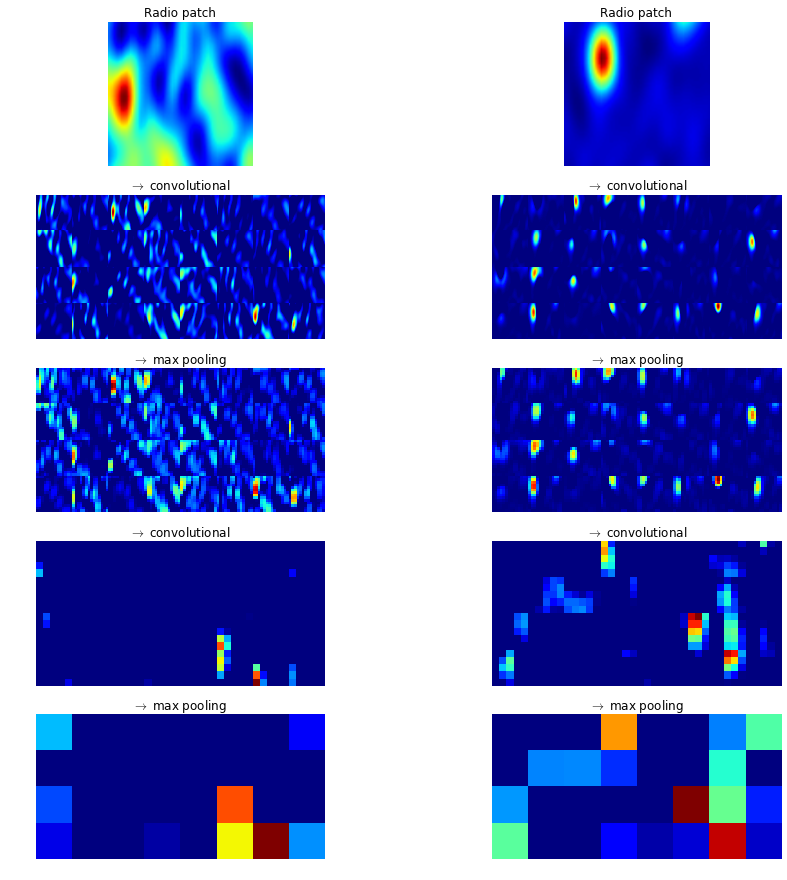

In [75]:
import matplotlib.pyplot
%matplotlib inline

import numpy

def imgrid(ims, w, h, x, y):
    return numpy.vstack([
            numpy.hstack(
                i.reshape(w, h)
                for i in ims[0, j * x:(j + 1) * x])
            for j in range(y)])

matplotlib.pyplot.figure(figsize=(15, 15))

matplotlib.pyplot.subplot(5, 2, 1)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('Radio patch')
matplotlib.pyplot.imshow(radio_1)
matplotlib.pyplot.subplot(5, 2, 2)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('Radio patch')
matplotlib.pyplot.imshow(radio_2)

matplotlib.pyplot.subplot(5, 2, 3)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ convolutional')
matplotlib.pyplot.imshow(imgrid(convolutional_1_1, 71, 71, 8, 4), interpolation="nearest")
matplotlib.pyplot.subplot(5, 2, 4)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ convolutional')
matplotlib.pyplot.imshow(imgrid(convolutional_2_1, 71, 71, 8, 4), interpolation="nearest")

matplotlib.pyplot.subplot(5, 2, 5)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ max pooling')
matplotlib.pyplot.imshow(imgrid(max_pooling_1_1, 14, 14, 8, 4), interpolation="nearest")
matplotlib.pyplot.subplot(5, 2, 6)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ max pooling')
matplotlib.pyplot.imshow(imgrid(max_pooling_2_1, 14, 14, 8, 4), interpolation="nearest")

matplotlib.pyplot.subplot(5, 2, 7)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ convolutional')
matplotlib.pyplot.imshow(imgrid(convolutional_1_2, 5, 5, 8, 4), interpolation="nearest")
matplotlib.pyplot.subplot(5, 2, 8)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ convolutional')
matplotlib.pyplot.imshow(imgrid(convolutional_2_2, 5, 5, 8, 4), interpolation="nearest")

matplotlib.pyplot.subplot(5, 2, 9)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ max pooling')
matplotlib.pyplot.imshow(imgrid(max_pooling_1_2, 1, 1, 8, 4), interpolation="nearest")
matplotlib.pyplot.subplot(5, 2, 10)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ max pooling')
matplotlib.pyplot.imshow(imgrid(max_pooling_2_2, 1, 1, 8, 4), interpolation="nearest")

matplotlib.pyplot.show()

K:\Languages\Anaconda3\lib\site-packages\astropy\io\fits\util.py:578: UserWarning: Could not find appropriate MS Visual C Runtime library or library is corrupt/misconfigured; cannot determine whether your file object was opened in append mode.  Please consider using a file object opened in write mode instead.
  'Could not find appropriate MS Visual C Runtime '


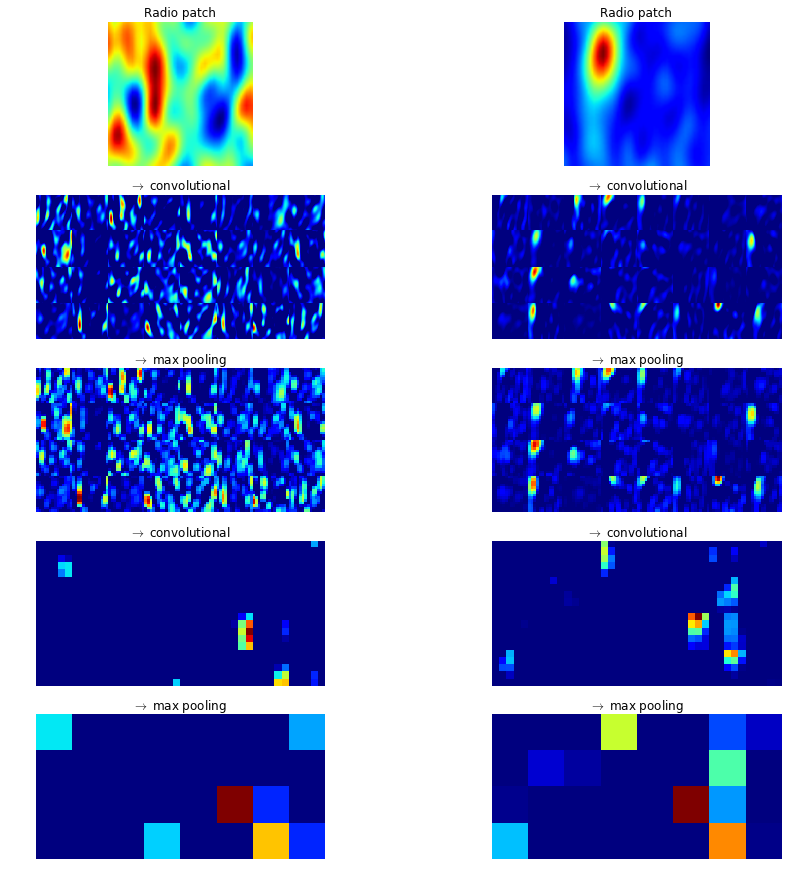

In [76]:
subject = crowdastro.data.get_random_subject()
radio_1 = crowdastro.data.get_radio(subject)[:80, :80]
radio_2 = crowdastro.data.get_radio(subject)[80:80 * 2, 80:80 * 2]
convolutional_1_1 = get_convolutional_output_1([radio_1.reshape(1, 1, 80, 80)])[0]
max_pooling_1_1 = get_max_pooling_output_1([radio_1.reshape(1, 1, 80, 80)])[0]
convolutional_1_2 = get_convolutional_output_2([radio_1.reshape(1, 1, 80, 80)])[0]
max_pooling_1_2 = get_max_pooling_output_2([radio_1.reshape(1, 1, 80, 80)])[0]
convolutional_2_1 = get_convolutional_output_1([radio_2.reshape(1, 1, 80, 80)])[0]
max_pooling_2_1 = get_max_pooling_output_1([radio_2.reshape(1, 1, 80, 80)])[0]
convolutional_2_2 = get_convolutional_output_2([radio_2.reshape(1, 1, 80, 80)])[0]
max_pooling_2_2 = get_max_pooling_output_2([radio_2.reshape(1, 1, 80, 80)])[0]

matplotlib.pyplot.figure(figsize=(15, 15))

matplotlib.pyplot.subplot(5, 2, 1)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('Radio patch')
matplotlib.pyplot.imshow(radio_1)
matplotlib.pyplot.subplot(5, 2, 2)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('Radio patch')
matplotlib.pyplot.imshow(radio_2)

matplotlib.pyplot.subplot(5, 2, 3)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ convolutional')
matplotlib.pyplot.imshow(imgrid(convolutional_1_1, 71, 71, 8, 4), interpolation="nearest")
matplotlib.pyplot.subplot(5, 2, 4)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ convolutional')
matplotlib.pyplot.imshow(imgrid(convolutional_2_1, 71, 71, 8, 4), interpolation="nearest")

matplotlib.pyplot.subplot(5, 2, 5)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ max pooling')
matplotlib.pyplot.imshow(imgrid(max_pooling_1_1, 14, 14, 8, 4), interpolation="nearest")
matplotlib.pyplot.subplot(5, 2, 6)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ max pooling')
matplotlib.pyplot.imshow(imgrid(max_pooling_2_1, 14, 14, 8, 4), interpolation="nearest")

matplotlib.pyplot.subplot(5, 2, 7)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ convolutional')
matplotlib.pyplot.imshow(imgrid(convolutional_1_2, 5, 5, 8, 4), interpolation="nearest")
matplotlib.pyplot.subplot(5, 2, 8)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ convolutional')
matplotlib.pyplot.imshow(imgrid(convolutional_2_2, 5, 5, 8, 4), interpolation="nearest")

matplotlib.pyplot.subplot(5, 2, 9)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ max pooling')
matplotlib.pyplot.imshow(imgrid(max_pooling_1_2, 1, 1, 8, 4), interpolation="nearest")
matplotlib.pyplot.subplot(5, 2, 10)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.title('$\\rightarrow$ max pooling')
matplotlib.pyplot.imshow(imgrid(max_pooling_2_2, 1, 1, 8, 4), interpolation="nearest")

matplotlib.pyplot.show()